In [2]:
import numpy as np
trainD = np.load("/home/hsiehch/30s/train_data.npy")
print(trainD.shape)
# counter = 0
# for data in trainD:
#     for i in data:
#         if i > 2 or i < -2:
#             counter = counter + 1
#             break
# print(counter)

(5078, 9000)


In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, AveragePooling1D, Dropout
from keras.layers import BatchNormalization, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight
import data_preprocessing as dp
np.set_printoptions(suppress=True)

ll = dp.makeData(30, 0.5, 0.2, 0.3)
trainD, trainL, validationD, validationL, testD, testL = ll.main()

trainData = trainD.reshape((trainD.shape[0], trainD.shape[1], 1))
trainLabel = np_utils.to_categorical(trainL, 4)
validationData = validationD.reshape((validationD.shape[0], validationD.shape[1], 1))
validationLabel = np_utils.to_categorical(validationL, 4)
testData = testD.reshape((testD.shape[0], testD.shape[1], 1))
testLabel = np_utils.to_categorical(testL, 4)
print('Train Data:', trainData.shape)
print('Train Label: ', trainLabel.shape)
print('Vali Data: ', validationData.shape)
print('Vali Label: ', validationLabel.shape)
print('Test Data: ', testData.shape)
print('Test Label: ', testLabel.shape)

class_w = class_weight.compute_sample_weight('balanced', [0,1,2,3], trainL)
print(class_w)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


1
2898


NameError: name 'exit' is not defined

In [2]:
try:
    model and parallel_model
except NameError:
    print("Good to go!")
    pass
else:   
    if model:
        del model
        del parallel_model
    print("Object has been cleaned!")


model = Sequential()
model.add(Conv1D(filters = 32, kernel_size = 7, input_shape = (trainData.shape[1], 1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 32, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 7))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 64, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 128, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 256, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))

model.add(Conv1D(filters = 256, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 512, kernel_size = 3))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = 2))
model.add(Dropout(0.5))

model.add(Conv1D(filters = 512, kernel_size = 3))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(4, activation = "softmax"))

print(model.summary())

adam = Adam(lr = 0.001)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics=['accuracy'])

cw = {0: class_w[0],
      1: class_w[1],
      2: class_w[2],
      3: class_w[3]}
# class_weight = class_weight.compute_sample_weight('balanced', [0,1,2,3], trainL)
early_stop = EarlyStopping(patience=20)
train_history_1 = model.fit(x = trainData,
                            y = trainLabel,
                            epochs=300,
                            validation_data=(validationData, validationLabel),
                            callbacks=[early_stop],
                            class_weight=cw,
                            batch_size=80,
                            verbose=1)

evaluation = model.evaluate(x = testData, y = testLabel)
print('Loss: {:.3f}, Accuracy: {:.3f}'.format(evaluation[0], evaluation[1]))


import pylab as plt
def history_display(hist, train, validation):
    plt.plot(hist.history[train])
    plt.plot(hist.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show
    
def show_plot(flag, hist):
    if flag == 'acc':
        history_display(hist, 'acc', 'val_acc')
    elif flag == 'loss':
        history_display(hist, 'loss', 'val_loss')
    else:
        print('Invalid!')



Good to go!
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 8994, 32)          256       
_________________________________________________________________
activation_1 (Activation)    (None, 8994, 32)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8994, 32)          128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4497, 32)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 4491, 32)          7200      
_________________________________________________________________
activation_2 (Activation)    (None, 4491, 32)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2245, 32)          0        

5078/5078 [==============================] - 4s 884us/step - loss: 0.3372 - acc: 0.8356 - val_loss: 0.6131 - val_acc: 0.7948
Epoch 80/300
5078/5078 [==============================] - 5s 933us/step - loss: 0.3468 - acc: 0.8192 - val_loss: 0.6069 - val_acc: 0.7918
Epoch 81/300
5078/5078 [==============================] - 4s 876us/step - loss: 0.4223 - acc: 0.8104 - val_loss: 0.5552 - val_acc: 0.7810
Epoch 82/300
5078/5078 [==============================] - 5s 901us/step - loss: 0.3871 - acc: 0.8027 - val_loss: 0.5147 - val_acc: 0.7987
Epoch 83/300
5078/5078 [==============================] - 5s 925us/step - loss: 0.4365 - acc: 0.7818 - val_loss: 0.5117 - val_acc: 0.7884
Epoch 84/300
5078/5078 [==============================] - 5s 889us/step - loss: 0.3339 - acc: 0.8257 - val_loss: 0.5675 - val_acc: 0.7948
Epoch 85/300
5078/5078 [==============================] - 5s 938us/step - loss: 0.3532 - acc: 0.8283 - val_loss: 0.5718 - val_acc: 0.8036
Epoch 86/300
5078/5078 [=======================

In [3]:
import pandas as pd

test_prediction = model.predict_classes(testData, batch_size=1)
pd.crosstab(testL, test_prediction, rownames=['Label'], colnames=['prediction'])

prediction,0,1,2,3
Label,,,,
0,216,4,5,45
1,6,50,19,14
2,5,18,1631,133
3,60,15,215,605


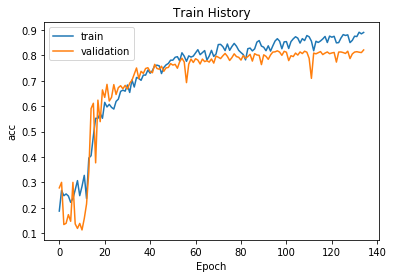

In [4]:
show_plot('acc', train_history_1)

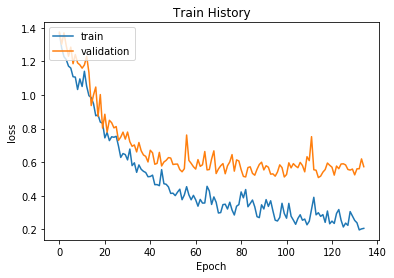

In [5]:
show_plot('loss', train_history_1)